In [ ]:
#Подопригора БИ-3-20-01
#ДЗ_3
#Задача 1

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
#Для расчет среднеквадратичной ошибки (RMSE), чтобы проверить точность нашей модели на тестовых данных.

from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Временной ряд')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

       # print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

In [43]:
df1=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz3_1.xlsx")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Дата                    94 non-null     int64  
 1   Золотовалютные резервы  94 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [44]:
df1.head(10)

,Дата,Золотовалютные резервы
0,0,182.2
1,7,182.3
2,14,184.6
3,21,185.2
4,28,188.2
5,35,188.5
6,42,194.2
7,49,195.4
8,56,195.6
9,63,197.9


In [45]:
df1.rename(columns = {'Золотовалютные резервы':'Gold', 'Дата':'Year'}, inplace = True )

In [46]:
df1.head(10)

,Year,Gold
0,0,182.2
1,7,182.3
2,14,184.6
3,21,185.2
4,28,188.2
5,35,188.5
6,42,194.2
7,49,195.4
8,56,195.6
9,63,197.9


In [47]:
df1['Gold'].describe()

count     94.000000
mean     300.142553
std       77.492897
min      182.200000
25%      247.050000
50%      281.150000
75%      371.325000
max      434.000000
Name: Gold, dtype: float64

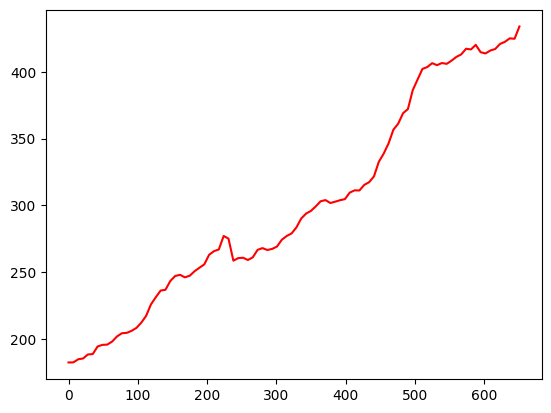

In [48]:
plt.plot(df1.Year,df1.Gold,color='red')
plt.show()

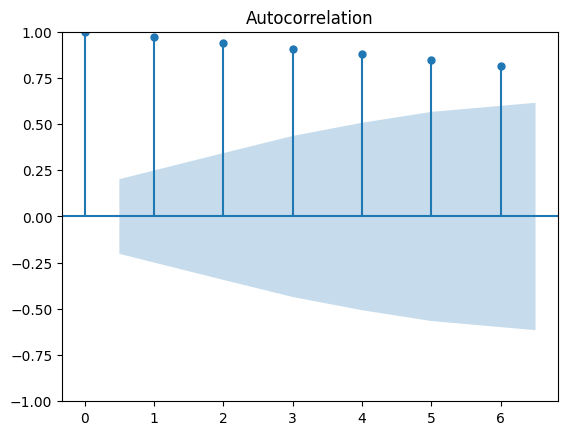

In [49]:
sm.graphics.tsa.plot_acf(df1.Gold,lags=6,alpha=0.05)
plt.show()

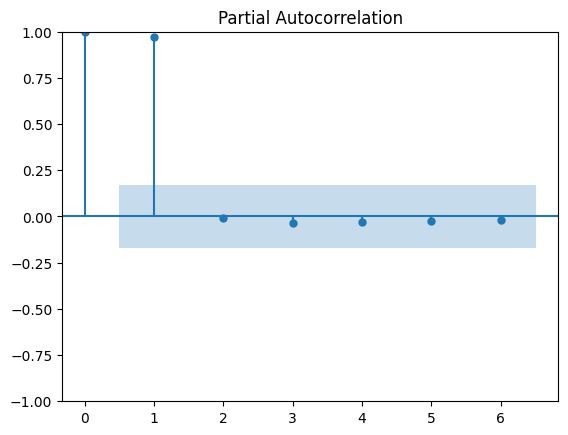

In [50]:
sm.graphics.tsa.plot_pacf(df1.Gold,lags=6,alpha=0.1);
plt.show()

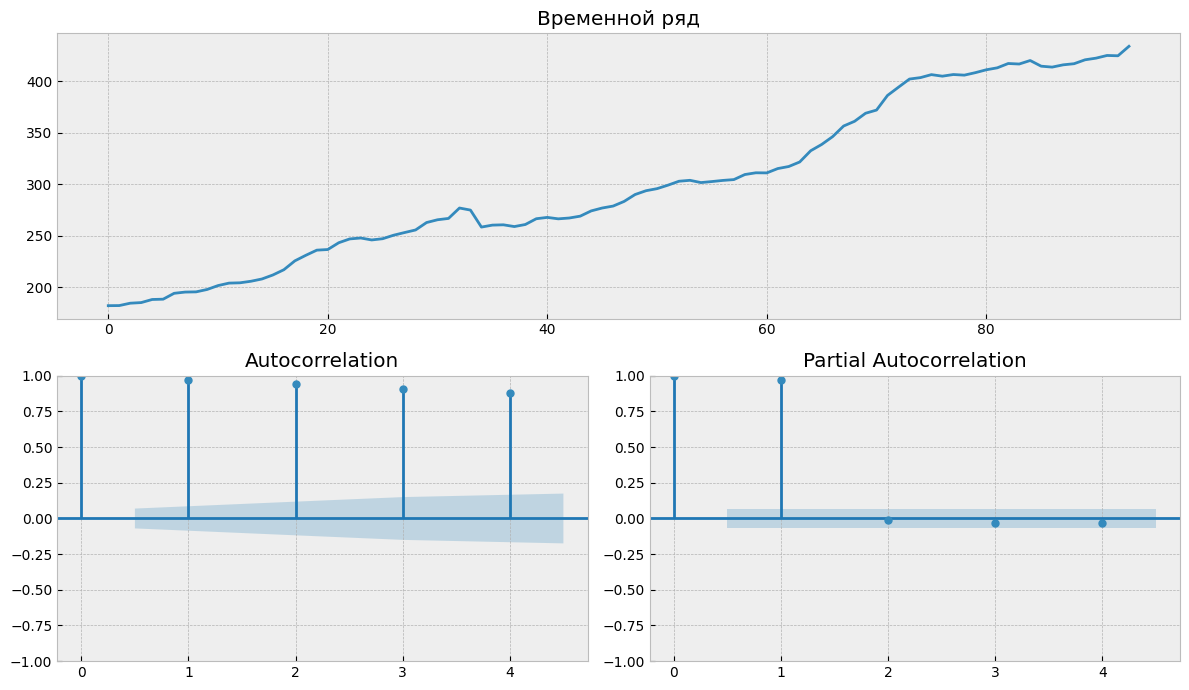

In [51]:
tsplot(df1.Gold,lags=4)
plt.show()

In [52]:
#Проверка по критерию Дики-Фуллера. Нулевая гипотеза предполагает, что ряд DS - нестационарен
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df1.Gold, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.2084881376184209
p-value: 0.9727336695003054


In [53]:
#Ряд нестационарен. p-value = 0,972. гипотеза Н1 не выполняется
#Проверка по критерию KPSS. Нулевая гипотеза предполагает, что ряд ТS - стационарен
# KPSS Test
result = kpss(df1.Gold, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])


KPSS Statistic: 1.609016
p-value: 0.010000


C:\Users\annap\AppData\Local\Temp\ipykernel_22568\2839787776.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df1.Gold, regression='c')


In [54]:
#Гипотеза выполняется
df2=df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    94 non-null     int64  
 1   Gold    94 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


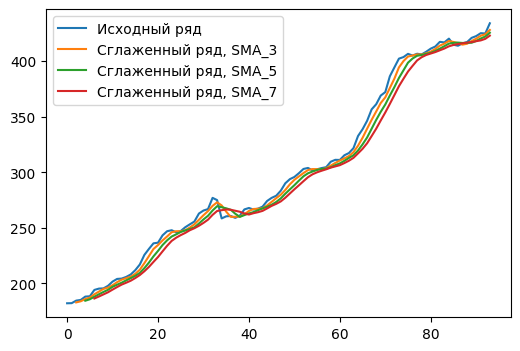

,Year,Gold,SMA_3,SMA_5,SMA_7
0,0,182.2,NaN,NaN,NaN
1,7,182.3,NaN,NaN,NaN
2,14,184.6,183.0,NaN,NaN
3,21,185.2,184.0,NaN,NaN
4,28,188.2,186.0,184.5,NaN
...,...,...,...,...,...
89,623,420.9,418.0,416.5,417.1
90,630,422.5,420.2,418.1,417.9
91,637,425.1,422.8,420.3,418.6
92,644,424.8,424.1,422.1,420.0


In [55]:
#Метод SMA
#SMA(3), SMA(5)
plt.figure(figsize =(6, 4))
#сглаживание с окном равным 3
for i in range(0,len(df2)-2):
    df2.loc[df2.index[i+2],'SMA_3'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1])/3),1)
plt.plot(df1['Gold'],label='Исходный ряд')
plt.plot(df2['SMA_3'], label='Сглаженный ряд, SMA_3')

#сглаживание с окном равным 5
for i in range(0,len(df2)-4):
    df2.loc[df2.index[i+4],'SMA_5'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1]+df2.iloc[i+3,1]+df2.iloc[i+4,1])/5),1)
plt.plot(df2['SMA_5'], label='Сглаженный ряд, SMA_5')

#сглаживание с окном равным 7
for i in range(0,len(df2)-6):
    df2.loc[df2.index[i+6],'SMA_7'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1]+df2.iloc[i+3,1]+df2.iloc[i+4,1]+ +df2.iloc[i+5,1]+df2.iloc[i+6,1])/7),1)
plt.plot(df2['SMA_7'], label='Сглаженный ряд, SMA_7')
plt.legend()
plt.show()
df2

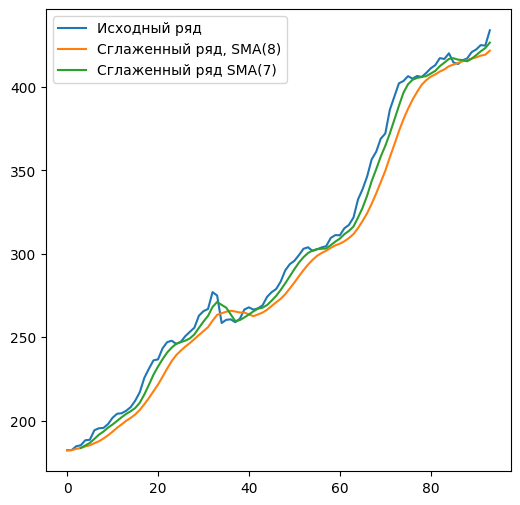

In [57]:
#Provide rolling window calculations.
#rolling mean
df2['SMA_8'] = df2.Gold.rolling(8, min_periods=1).mean()# Задан минимальный период для сглаживания
plt.figure(figsize=(6,6))
plt.plot(df1['Gold'],label='Исходный ряд')
plt.plot(df2['SMA_8'], label='Сглаженный ряд, SMA(8)')
df2['SMA_7'] = df2.iloc[:,1].rolling(window=4).mean()
plt.plot(df2['SMA_7'], label='Сглаженный ряд SMA(7)')
plt.legend()
plt.show()

In [62]:
df2

,Year,Gold,SMA_3,SMA_5,SMA_7,SMA_8,Smooth.1,Smooth.2,Smooth.3
0,0,182.2,NaN,NaN,NaN,182.200000,182.200000,182.200000,182.2
1,7,182.3,NaN,NaN,NaN,182.250000,182.266667,182.290909,182.3
2,14,184.6,183.0,NaN,NaN,183.033333,183.600000,184.371171,184.6
3,21,185.2,184.0,NaN,183.575,183.575000,184.453333,185.117192,185.2
4,28,188.2,186.0,184.5,185.075,184.500000,186.387097,187.891747,188.2
...,...,...,...,...,...,...,...,...,...
89,623,420.9,418.0,416.5,416.950,417.100000,418.604688,420.506942,420.9
90,630,422.5,420.2,418.1,419.125,417.750000,420.552344,422.300694,422.5
91,637,425.1,422.8,420.3,421.400,418.787500,422.826172,424.820069,425.1
92,644,424.8,424.1,422.1,423.325,419.362500,423.813086,424.802007,424.8


In [80]:
#Задача 3
df3=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz3_2.xlsx")
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       25 non-null     int64  
 1   Y(t)    25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [81]:
df3.rename(columns = {'Y(t)':'Y'}, inplace = True )
df2 = df3.copy()
df3.head()

,t,Y
0,1,140.577750
1,2,126.184177
2,3,136.921240
3,4,144.027304
4,5,149.138982


Text(0, 0.5, 'Y_smooth')

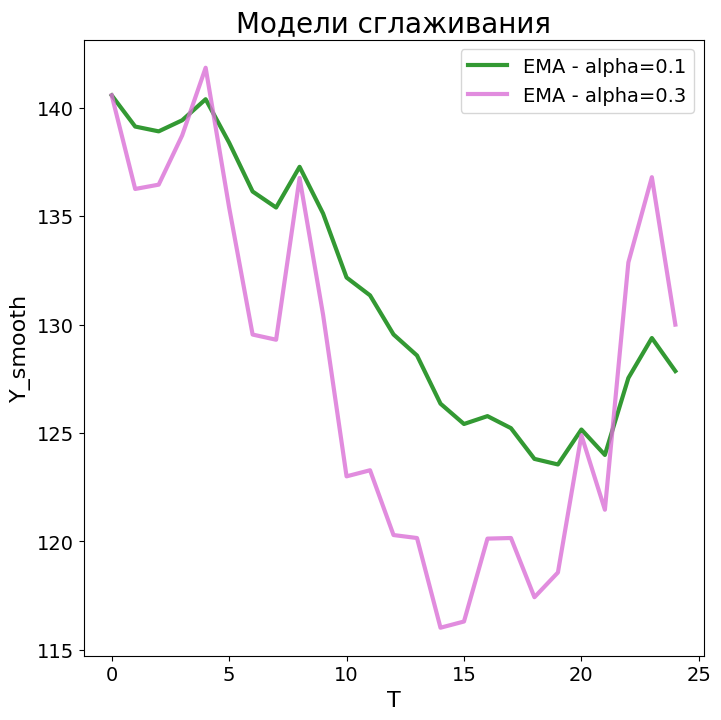

In [82]:
#Обеспечить экспоненциально взвешенные (EW) расчеты.
#При adjust=Falseэкспоненциально взвешенная функция вычисляется рекурсивно:

 
df3['EMA_0.1'] = df3.Y.ewm(alpha=0.1, adjust=False).mean()
df3['EMA_0.3'] = df3.Y.ewm(alpha=0.3, adjust=False).mean()
colors = ['green', 'orchid', 'orange']

df3[['EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(8,8), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('Модели сглаживания', fontsize=20)
plt.xlabel('T', fontsize=16)
plt.ylabel('Y_smooth', fontsize=16)

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit2=SimpleExpSmoothing(np.asarray(df3.Y)).fit(smoothing_level=0.1,optimized=False)
str(fit2)
fit2

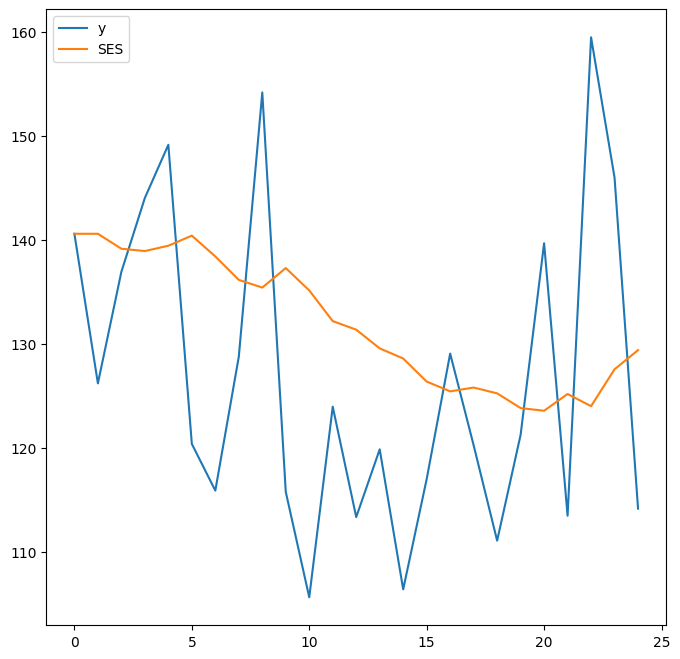

array([127.86009815, 127.86009815, 127.86009815])

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit2=SimpleExpSmoothing(np.asarray(df3.Y)).fit(smoothing_level=0.1,optimized=False)
df3['SES'] = fit2.fittedvalues
plt.figure(figsize=(8,8))
plt.plot(df2.Y, label='y')
plt.plot(df3['SES'], label='SES')
plt.legend(loc='best')
plt.show()
fit2.forecast(3)
#получилось как в эксель и в r

In [93]:
#задача 4
df4=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz3_2.xlsx")
df4.rename(columns = {'Y(t)':'Y'}, inplace = True )
df5= df4.copy()

In [94]:
df5.head()

,t,Y
0,1,140.577750
1,2,126.184177
2,3,136.921240
3,4,144.027304
4,5,149.138982


[136.46163245 138.81974454 141.17785663 143.53596872 145.89408081]


C:\Users\annap\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


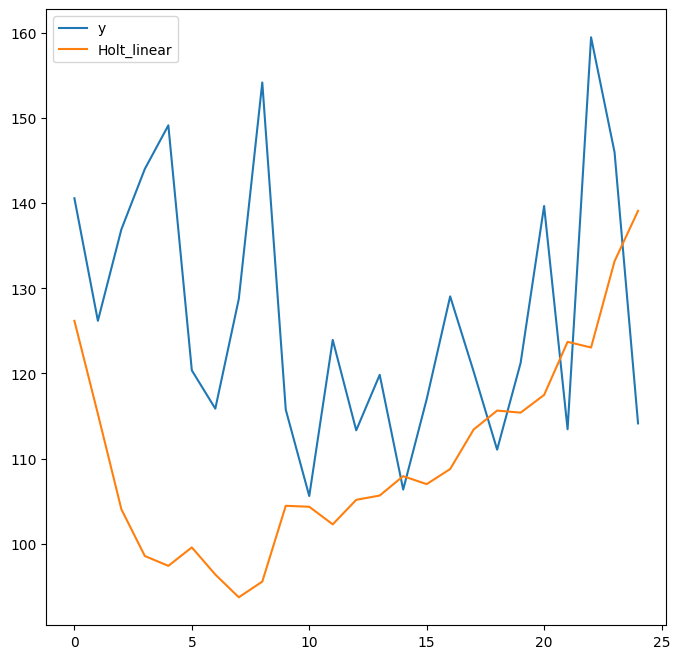

In [97]:
from statsmodels.tsa.holtwinters import Holt

model=Holt(np.asarray(df5.Y))
fit1=model.fit(smoothing_level=0.2,smoothing_trend=0.2)
print(fit1.forecast(5))

plt.figure(figsize=(8,8));
plt.plot(df4.Y, label='y');
plt.plot(fit1.fittedvalues, label='Holt_linear');
plt.legend(loc='best');
plt.show();

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,Holt,SimpleExpSmoothing

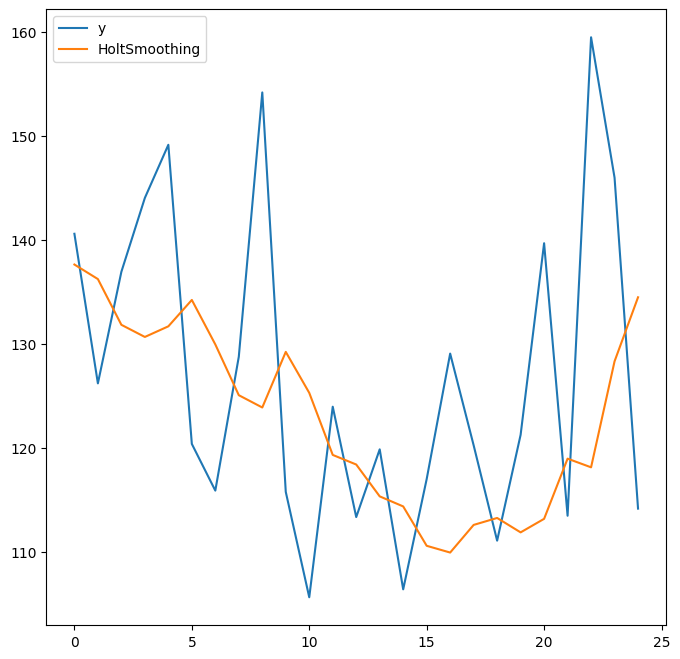

In [99]:
#Holt Winter's Exponential Smoothing
#ExponentialSmoothing
#Exponential smoothing with trend and seasonal components.
model=ExponentialSmoothing(np.asarray(df5.Y),trend="add")
fit=model.fit(smoothing_level=0.2,smoothing_trend=0.2)
df5['SimpleExpSmoothing'] = fit.fittedvalues
plt.figure(figsize=(8,8));
plt.plot(df4.Y, label='y');
plt.plot(df5['SimpleExpSmoothing'], label='HoltSmoothing');
plt.legend(loc='best')
plt.show();